In [3]:
import pandas  as pd

In [4]:
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
import nltk 

In [8]:
df.duplicated().sum()

418

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x212bc27d700>,
 [Text(-0.006481911407536943, 1.0999809020271694, 'posetive'),
  Text(0.006482014395181169, -1.0999809014202842, 'negetive')],
 [Text(-0.0035355880404746957, 0.5999895829239105, '50.19'),
  Text(0.0035356442155533648, -0.5999895825928822, '49.81')])

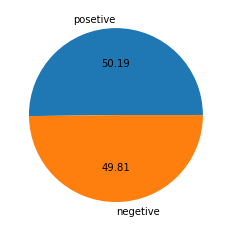

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels=['posetive','negetive'], autopct='%0.2f')

<h1>preprocessing</h1>

In [13]:
from nltk.corpus import stopwords
stopwords.words('english')  #this are stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')
import string

In [15]:
def preprocessor_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum(): #this fnvton will add text in y list only if text is alphabet or number
            y.append(i)
        
    text= y[:]    # here we are using cloning because if we clear y without [:] it will clear text also so here we clone y in text than clear y
    y.clear()           #so here we clone y in text than clear y
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    text = y[:]
    y = []
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [16]:
preprocessor_text('i am keshav yadav who are you dancing')

'keshav yadav danc'

In [62]:
df['transformed_text'] = df['review'].apply(preprocessor_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9140\2768448643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['review'].apply(preprocessor_text)


In [32]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [64]:
df.to_csv('output_file.csv',index=False)

In [17]:
df = pd.read_csv('output_file.csv')

In [18]:
df

,review,sentiment,transformed_text
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...
...,...,...,...
49577,I thought this movie did a down right good job...,positive,thought movi right good job creativ origin fir...
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...
49579,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...
49580,I'm going to have to disagree with the previou...,negative,go disagre previou comment side maltin one sec...


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['traget'] = le.fit_transform(df['sentiment'])


In [20]:
df.rename(columns={'traget': 'target'}, inplace=True)

In [21]:
df

,review,sentiment,transformed_text,target
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod hook righ...,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu fashi...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
49577,I thought this movie did a down right good job...,positive,thought movi right good job creativ origin fir...,1
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,0
49579,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,0
49580,I'm going to have to disagree with the previou...,negative,go disagre previou comment side maltin one sec...,0


In [22]:

df['transformed_text'] = df['transformed_text'].str.replace('br', ' ')
df

,review,sentiment,transformed_text,target
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod hook righ...,1
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu fashion...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
49577,I thought this movie did a down right good job...,positive,thought movi right good job creativ origin fir...,1
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogu bad act idiot direct anno...,0
49579,I am a Catholic taught in parochial elementary...,negative,cathol taught parochi elementari school nun ta...,0
49580,I'm going to have to disagree with the previou...,negative,go disagre previou comment side maltin one sec...,0


In [23]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [24]:
len(spam_corpus)

2892415

In [25]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'sns' is not defined

<h1>Model bulding</h1>

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [27]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x.shape

(49582, 3000)

In [29]:
y = df['target'].values

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [32]:
gnb.fit(x_train,y_train)
y_prdt = gnb.predict(x_test)
print(confusion_matrix(y_test,y_prdt))
print(accuracy_score(y_test,y_prdt))
print(precision_score(y_test,y_prdt))

[[3913 1021]
 [ 983 4000]]
0.7979227588988606
0.7966540529774945


In [33]:
mnb.fit(x_train,y_train)
y_prdt = mnb.predict(x_test)
print(confusion_matrix(y_test,y_prdt))
print(accuracy_score(y_test,y_prdt))
print(precision_score(y_test,y_prdt))

[[4092  842]
 [ 687 4296]]
0.8458203085610567
0.8361230050603348


In [34]:
bnb.fit(x_train,y_train)
y_prdt = bnb.predict(x_test)
print(confusion_matrix(y_test,y_prdt))
print(accuracy_score(y_test,y_prdt))
print(precision_score(y_test,y_prdt))

[[4130  804]
 [ 758 4225]]
0.8424926893213673
0.8401272618810897


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [37]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [38]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [42]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x 
                                                          _test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.878693153171322
Precision -  0.8694292415949961
For  KN
Accuracy -  0.7492185136634063
Precision -  0.7204168138466973
For  NB
Accuracy -  0.8458203085610567
Precision -  0.8361230050603348
For  DT
Accuracy -  0.6981950186548351
Precision -  0.6430008623167577
For  LR
Accuracy -  0.8812140768377533
Precision -  0.8679172307097274
For  RF
Accuracy -  0.8371483311485328
Precision -  0.8432531593966571
For  AdaBoost
Accuracy -  0.8069980840980135
Precision -  0.7825446510771497
For  BgC
Accuracy -  0.803670464858324
Precision -  0.8037214885954381
For  ETC
Accuracy -  0.8480387213875163
Precision -  0.8558558558558559
For  GBDT
Accuracy -  0.7843097711001311
Precision -  0.7450879007238883
For  xgb
Accuracy -  0.8381567006151054
Precision -  0.8174812030075188


i got maximum in linier rigration model so i will go with that

In [64]:
text = "movie was good but i feel but you must go and watch"

In [65]:
text1 = preprocessor_text(text)
text1

'movi good feel must go watch'

In [66]:
x1 = tfidf.transform([text1]).toarray()

In [67]:
y = lrc.predict(x1)
y

array([1])

In [68]:
if y == 1:
    print('posetive')
else:
    print('negetive')

posetive
